In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Primary Analysis

In [3]:
top_30_locations = df1.location.value_counts().head(30).index
check_rel_loc = df1.location.apply(lambda x : x in top_30_locations)
df1[check_rel_loc]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
...,...,...,...,...,...,...,...,...,...
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00


In [4]:
top_10_locations = df1.location.value_counts().head(10).index
data = []
for loc in top_10_locations:
  data.append(df1.price[df1.location.apply(lambda x : x == loc)])

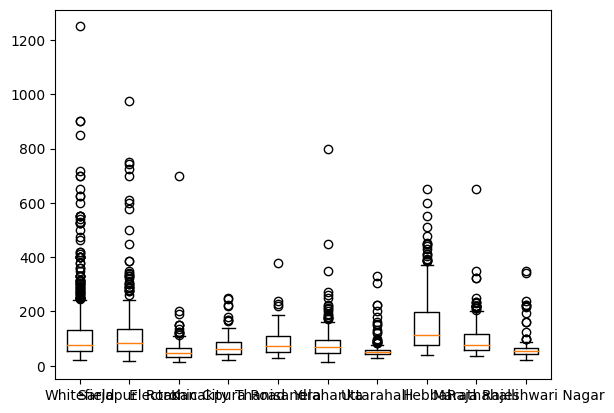

In [5]:
plt.boxplot(data, labels=top_10_locations)
plt.show()

In [6]:
df1.shape

(13320, 9)

In [7]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

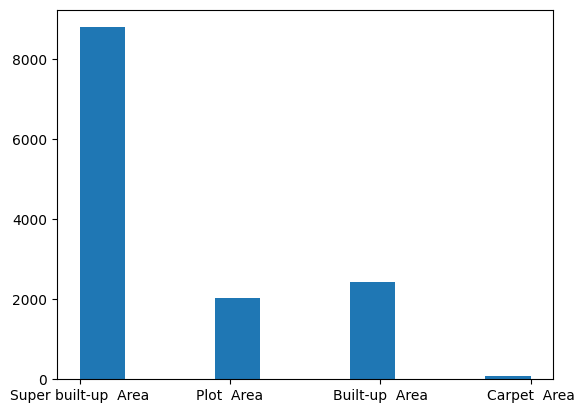

In [8]:
plt.hist(df1.area_type)
plt.show()

In [9]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df1.price.isna().any()

False

In [11]:
df1 = df1.rename(columns = {'size' : 'rooms'})
df1.rooms.unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Data Cleaning and Manipulation

In [12]:
df2 = df1.dropna(subset = ['rooms'])

In [13]:
df2[df2.rooms.str.contains('RK')].rooms.unique()

array(['1 RK'], dtype=object)

In [14]:
df2['bedrooms'] = df2.rooms.str.split(' ', expand=True)[0]
df2.head()

<ipython-input-14-2b30225f1a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedrooms'] = df2.rooms.str.split(' ', expand=True)[0]


,area_type,availability,location,rooms,society,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [15]:
df2.rooms.str.split(' ', expand=True)[1].value_counts()

BHK        10766
Bedroom     2525
RK            13
Name: 1, dtype: int64

In [16]:
df2['kitchen'] = df2.rooms.str.contains('K')*1
df2.head()

<ipython-input-16-c1ee53bfc02b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kitchen'] = df2.rooms.str.contains('K')*1


,area_type,availability,location,rooms,society,total_sqft,bath,balcony,price,bedrooms,kitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1


In [17]:
df2['hall'] = df2.rooms.str.contains('H')*1
df2.head()

<ipython-input-17-d4d3b5e2d6f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hall'] = df2.rooms.str.contains('H')*1


,area_type,availability,location,rooms,society,total_sqft,bath,balcony,price,bedrooms,kitchen,hall
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1,1


In [18]:
df2.drop('rooms', axis=1, inplace=True)

<ipython-input-18-05f0ed671c65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('rooms', axis=1, inplace=True)


In [19]:
df2.bedrooms.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [20]:
df2 = df2.astype({'bedrooms':'int64'})

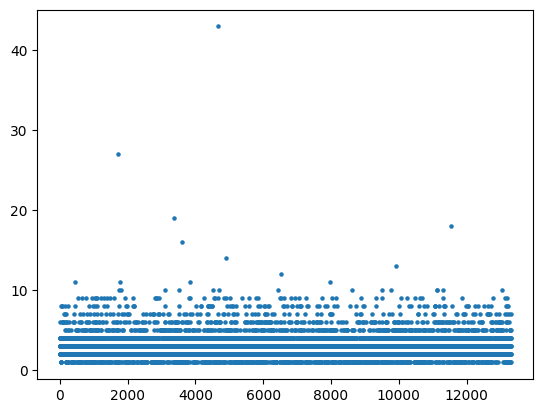

In [21]:
plt.scatter(range(df2.bedrooms.size), df2.bedrooms, s=5)

In [22]:
df2[df2.bedrooms > 15]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedrooms,kitchen,hall
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,NaN,8000,27.0,0.0,230.0,27,1,1
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,NaN,2000,16.0,NaN,490.0,19,1,1
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,NaN,10000,16.0,NaN,550.0,16,1,1
4684,Plot Area,Ready To Move,Munnekollal,NaN,2400,40.0,0.0,660.0,43,0,0
11559,Plot Area,18-Apr,1Kasavanhalli,HMwerCo,1200,18.0,NaN,200.0,18,0,0


In [23]:
df2.total_sqft.describe()

count     13304
unique     2110
top        1200
freq        843
Name: total_sqft, dtype: object

In [24]:
df2.total_sqft.str.extract(r'([^\d]+)').value_counts()

 -           188
.            108
Sq. Yards     11
Sq. Meter      9
Acres          4
Cents          2
Guntha         2
Grounds        1
Perch          1
dtype: int64

In [25]:
df2.total_sqft.str.findall(r'([^\d])').value_counts()

[]                                12978
[ , -,  ]                           188
[.]                                  87
[S, q, .,  , Y, a, r, d, s]          11
[S, q, .,  , M, e, t, e, r]           9
[., S, q, .,  , M, e, t, e, r]        8
[.,  , -,  , .]                       5
[., A, c, r, e, s]                    4
[A, c, r, e, s]                       4
[., S, q, .,  , Y, a, r, d, s]        4
[C, e, n, t, s]                       2
[G, u, n, t, h, a]                    2
[P, e, r, c, h]                       1
[G, r, o, u, n, d, s]                 1
Name: total_sqft, dtype: int64

In [26]:
df2.total_sqft.str.contains(' - ').value_counts()

False    13111
True       193
Name: total_sqft, dtype: int64

In [27]:
lower_upper_val = df2.total_sqft[df2.total_sqft.str.contains(' - ')].str.split(' - ', expand = True).astype('float64')
mean_val_sqft = lower_upper_val.assign(mean_val = (lower_upper_val[0]+lower_upper_val[1])/2).mean_val
df3 = df2.copy()
df3.total_sqft[df2.total_sqft.str.contains(' - ')] = mean_val_sqft

<ipython-input-27-6c715b24c6d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.total_sqft[df2.total_sqft.str.contains(' - ')] = mean_val_sqft


In [28]:
df3.total_sqft.str.extract(r'([^\d]+)').value_counts()

.            103
Sq. Yards     11
Sq. Meter      9
Acres          4
Cents          2
Guntha         2
Grounds        1
Perch          1
dtype: int64

In [29]:
df3.total_sqft.str.findall(r'([^\d])').value_counts()

[]                                12978
[.]                                  87
[S, q, .,  , Y, a, r, d, s]          11
[S, q, .,  , M, e, t, e, r]           9
[., S, q, .,  , M, e, t, e, r]        8
[., A, c, r, e, s]                    4
[A, c, r, e, s]                       4
[., S, q, .,  , Y, a, r, d, s]        4
[C, e, n, t, s]                       2
[G, u, n, t, h, a]                    2
[P, e, r, c, h]                       1
[G, r, o, u, n, d, s]                 1
Name: total_sqft, dtype: int64

In [30]:
df3.total_sqft.str.extract('([\D]+$)').value_counts()

Sq. Meter    17
Sq. Yards    15
Acres         8
Cents         2
Guntha        2
Grounds       1
Perch         1
dtype: int64

In [31]:
area_conversion_to_sqft = {
    'Sq. Yards' : 9,
    'Sq. Meter' : 10.76,
    'Acres' : 43560,
    'Cents' : 435.56,
    'Guntha' : 1089,
    'Grounds' : 2400.35,
    'Perch' : 272.25
}

In [32]:
area_to_convert = df3.total_sqft[df3.total_sqft.str.contains('[a-zA-Z]') == True]
area_values = area_to_convert.str.extract('([\d\.]+)').astype('float64')[0]
conversion_factor = df3.total_sqft.str.extract('([\D]+$)').dropna()[0].replace(area_conversion_to_sqft)
converted_area = round(area_values*conversion_factor, 2)
converted_area.head(5)

410         370.79
648     1123031.25
775       10760.00
872        9900.00
1019     231303.60
Name: 0, dtype: float64

In [33]:
df4 = df3.copy()
df4.total_sqft[converted_area.index] = converted_area

<ipython-input-33-7dacd365c2b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.total_sqft[converted_area.index] = converted_area


In [34]:
df4.total_sqft = df4.total_sqft.astype('float64')
df4.total_sqft.describe()

count    1.330400e+04
mean     1.911202e+03
std      1.728707e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276000e+03
75%      1.680000e+03
max      1.306800e+06
Name: total_sqft, dtype: float64

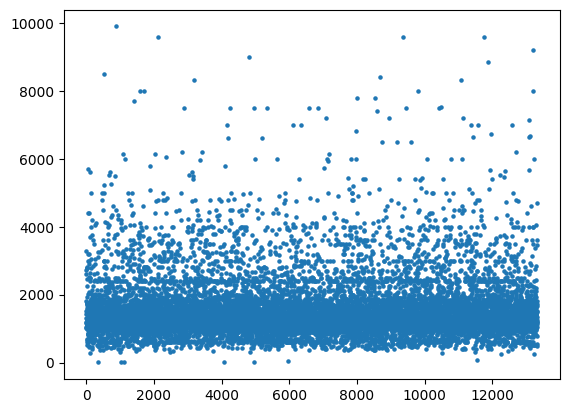

In [35]:
area_below_10k = df4[df4.total_sqft < 10000].total_sqft
plt.scatter(area_below_10k.index, area_below_10k, s=5)

In [36]:
df4.total_sqft.corr(df4.price)

0.04897811261958751

In [37]:
df4.isna().sum()

area_type          0
availability       0
location           1
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bedrooms           0
kitchen            0
hall               0
dtype: int64

In [38]:
df4.bath.corr(df4.price)

0.45634510346350105

In [39]:
df3.balcony.corr(df3.price)

0.12035530938067719

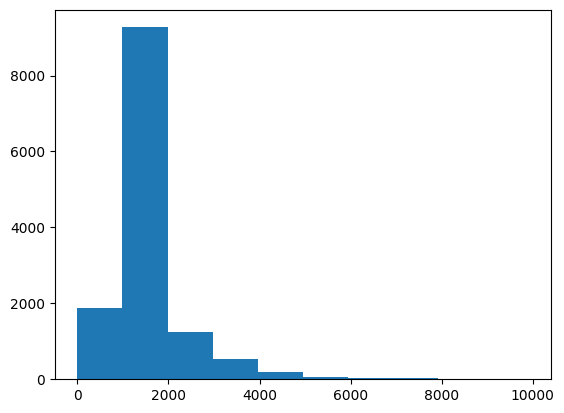

In [40]:
plt.hist(df4.total_sqft[df4.total_sqft<10000])
plt.show()

In [41]:
df4.corr()

<ipython-input-41-d025aacce9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()


,total_sqft,bath,balcony,price,bedrooms,kitchen,hall
total_sqft,1.000000,0.053100,0.006551,0.048978,0.054269,-0.052928,-0.052620
bath,0.053100,1.000000,0.204201,0.456345,0.898408,-0.429630,-0.425632
balcony,0.006551,0.204201,1.000000,0.120355,0.187291,0.135155,0.138496
price,0.048978,0.456345,0.120355,1.000000,0.398292,-0.299458,-0.297461
bedrooms,0.054269,0.898408,0.187291,0.398292,1.000000,-0.465028,-0.460651
kitchen,-0.052928,-0.429630,0.135155,-0.299458,-0.465028,1.000000,0.996834
hall,-0.052620,-0.425632,0.138496,-0.297461,-0.460651,0.996834,1.000000


In [42]:
from scipy import stats

In [43]:
df4['price_per_sqft'] = df4.price*100000/df4.total_sqft
df4['price_per_room'] = df4.price/df4.bedrooms
df4['area_per_room'] = df4.total_sqft/df4.bedrooms

In [44]:
for soc in df4.society.unique():
  if (df4[df4.society == soc].location.unique().size !=1 ):
    print (soc, df4[df4.society == soc].location.unique().size, df4[df4.society == soc].location.unique())

nan 0 []
Bhe 2ko 2 [' Thanisandra' 'Thanisandra']
PrarePa 3 ['Kanakpura Road' 'Bannerghatta Road' 'Judicial Layout']
Rosha I 2 ['Bhoganhalli' ' Bhoganhalli']
Chranya 2 ['Whitefield' 'Gunjur']
Bhmesy  2 ['Thanisandra' ' Thanisandra']
HMwerCo 2 ['Kasavanhalli' '1Kasavanhalli']
GMown E 2 ['Electronic City' ' Electronic City']
Sancya  3 ['Whitefield' 'Medahalli' 'Dollars Layout']
Bancyri 2 ['Giri Nagar' '1 Giri Nagar']
Vantspa 2 ['Defence Colony' 'Begur']
Grare S 2 [nan 'Anantapura']
MancyRe 4 ['Kalena Agrahara' 'Malleshpalya' 'Bellandur' 'LB Shastri Nagar']
Srisei  2 ['KSRTC Layout' 'Sarjapur  Road']
Prtates 2 ['Whitefield' ' Whitefield']
SrncyRe 3 ['7th Phase JP Nagar' 'Marathahalli' 'Kaggadasapura']
Prs 2hi 2 ['Kodichikkanahalli' 'Mico Layout']
Suncy R 2 ['Basaveshwara Nagar' 'Remco Bhel Layout']
PancyRe 2 ['RWF West Colony' 'Munnekollal']
Maens G 2 ['Jaya Nagar East' 'Malleshwaram']
Lancy R 2 ['TC Palaya' 'Raja Rajeshwari Nagar']
Srncy R 2 ['Amruthahalli' 'Sarjapur  Road']
AsNowre 2 ['

In [45]:
def iqr_trim(ser):
  iqr = ser.quantile(0.75) - ser.quantile(0.25)
  low_lim = ser.quantile(0.25) - 1.5*iqr
  up_lim = ser.quantile(0.75) + 1.5*iqr
  return low_lim, up_lim

In [46]:
def percentile_trim(ser, up_per, low_per):
  low_lim = ser.quantile(low_per)
  up_lim = ser.quantile(up_per)
  return low_lim, up_lim

In [47]:
def z_std_trim(ser, z):
  low_lim = ser.mean() - z*ser.std()
  up_lim = ser.mean() + z*ser.std()
  return low_lim, up_lim

In [48]:
def z_mad_trim(ser, z):
  low_lim = ser.median() - (z*ser.mad())/0.6745
  up_lim = ser.median() + (z*ser.mad())/0.6745
  return low_lim, up_lim

In [49]:
df4.area_per_room.describe()

count     13304.000000
mean        701.785837
std        6563.091698
min           0.250000
25%         473.333333
50%         552.500000
75%         625.000000
max      653400.000000
Name: area_per_room, dtype: float64

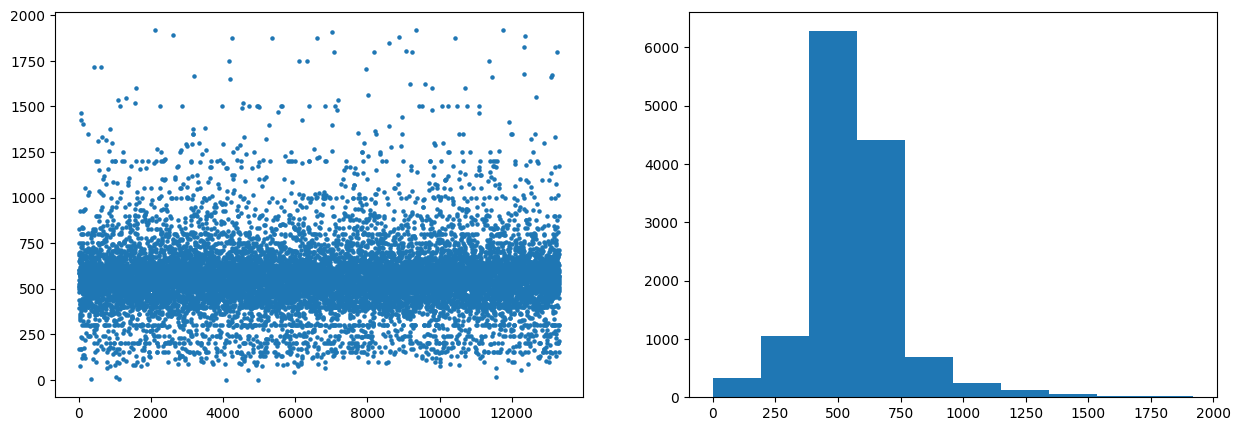

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(df4.area_per_room[df4.area_per_room<2000].index, df4.area_per_room[df4.area_per_room<2000], s=5)
ax[1].hist(df4.area_per_room[df4.area_per_room<2000])
plt.show()

In [51]:
percentile_trim(df4.area_per_room, 0.98, 0.04)

(240.0, 1171.3666666666693)

In [52]:
iqr_trim(df4.area_per_room)

(245.8333333333333, 852.5)

In [53]:
z_std_trim(df4.area_per_room, 0.04)

(439.2621692770152, 964.3095051372786)

In [54]:
z_mad_trim(df4.area_per_room, 2)

<ipython-input-48-e34ab8e167cb>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  low_lim = ser.median() - (z*ser.mad())/0.6745
<ipython-input-48-e34ab8e167cb>:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  up_lim = ser.median() + (z*ser.mad())/0.6745


(-424.09398274513944, 1529.0939827451393)

In [55]:
area_per_room_low_lim, area_per_room_up_lim = percentile_trim(df4.area_per_room, 0.98, 0.04)
# area_per_room_low_lim, area_per_room_up_lim = iqr_trim(df4.area_per_room)
# area_per_room_low_lim, area_per_room_up_lim = z_std_trim(df4.area_per_room, 0.06)
# area_per_room_low_lim, area_per_room_up_lim = z_mad_trim(df4.area_per_room, 0.6)

df4_test = df4[(df4.area_per_room < area_per_room_up_lim)&(df4.area_per_room > area_per_room_low_lim)].drop(['price_per_sqft', 'price_per_room', 'area_per_room', 'price', 'kitchen', 'hall'], 1)

<ipython-input-55-85bc66b0479c>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df4_test = df4[(df4.area_per_room < area_per_room_up_lim)&(df4.area_per_room > area_per_room_low_lim)].drop(['price_per_sqft', 'price_per_room', 'area_per_room', 'price', 'kitchen', 'hall'], 1)


In [56]:
df4_test.corrwith(df4.price).mean(), len(df4_test)

<ipython-input-56-33258c63a189>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4_test.corrwith(df4.price).mean(), len(df4_test)


(0.48072682590326643, 12431)

In [57]:
area_per_room_low_lim, area_per_room_up_lim = percentile_trim(df4.area_per_room, 0.98, 0.04)
df5 = df4[(df4.area_per_room < area_per_room_up_lim)&(df4.area_per_room > area_per_room_low_lim)]

In [58]:
iqr_trim(df5.price_per_sqft)

(172.85405079591146, 10939.980090778743)

In [59]:
price_per_sqft_low_lim, price_per_sqft_up_lim = percentile_trim(df5.price_per_sqft, 0.9, 0.01)
# price_per_sqft_low_lim, price_per_sqft_up_lim = iqr_trim(df5.price_per_sqft)
# price_per_sqft_low_lim, price_per_sqft_up_lim = z_std_trim(df5.price_per_sqft, 0.06)
# price_per_sqft_low_lim, price_per_sqft_up_lim = z_mad_trim(df5.price_per_sqft, 0.6)

df5_test = df5[(df5.price_per_sqft < price_per_sqft_up_lim)&(df5.price_per_sqft > price_per_sqft_low_lim)].drop(['area_per_room', 'price_per_room', 'price_per_sqft', 'price', 'kitchen', 'hall'], 1)

<ipython-input-59-454a914c9fa2>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df5_test = df5[(df5.price_per_sqft < price_per_sqft_up_lim)&(df5.price_per_sqft > price_per_sqft_low_lim)].drop(['area_per_room', 'price_per_room', 'price_per_sqft', 'price', 'kitchen', 'hall'], 1)


In [60]:
df5_test.corrwith(df5.price), len(df5_test)

<ipython-input-60-d659df357dad>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5_test.corrwith(df5.price), len(df5_test)


(total_sqft    0.871002
 bath          0.682421
 balcony       0.189537
 bedrooms      0.620199
 dtype: float64,
 11053)

In [61]:
df6 = df5[(df5.price_per_sqft < percentile_trim(df5.price_per_sqft, 0.9, 0.01)[1])&(df5.price_per_sqft > percentile_trim(df5.price_per_sqft, 0.9, 0.01)[0])]

In [62]:
price_per_room_low_lim, price_per_room_up_lim = percentile_trim(df6.price_per_room, 0.98, 0.05)
# price_per_room_low_lim, price_per_room_up_lim = iqr_trim(df6.price_per_room)
# price_per_room_low_lim, price_per_room_up_lim = z_std_trim(df6.price_per_room, 0.06)
# price_per_room_low_lim, price_per_room_up_lim = z_mad_trim(df6.price_per_room, 0.6)

df6_test = df6[(df6.price_per_room < price_per_room_up_lim)&(df6.price_per_room > price_per_room_low_lim)].drop(['area_per_room', 'price_per_sqft', 'price_per_room', 'price', 'kitchen', 'hall'], 1)

<ipython-input-62-f58cb1686006>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df6_test = df6[(df6.price_per_room < price_per_room_up_lim)&(df6.price_per_room > price_per_room_low_lim)].drop(['area_per_room', 'price_per_sqft', 'price_per_room', 'price', 'kitchen', 'hall'], 1)


In [63]:
df6_test.corrwith(df6.price).mean(), len(df6_test)

<ipython-input-63-0c8799958bea>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6_test.corrwith(df6.price).mean(), len(df6_test)


(0.6141029425822706, 10271)

In [64]:
iqr_trim(df6.price_per_room)

(-1.75, 60.25)

In [65]:
df7 =  df6[(df6.price_per_room < percentile_trim(df6.price_per_room, 0.98, 0.05)[1])&(df6.price_per_room > percentile_trim(df6.price_per_room, 0.98, 0.05)[0])]

In [66]:
df8 = df7.drop(['price_per_sqft', 'price_per_room', 'area_per_room'], 1)

<ipython-input-66-57d02786c2c8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df8 = df7.drop(['price_per_sqft', 'price_per_room', 'area_per_room'], 1)


In [67]:
df8[df8.bath >= df8.bedrooms + 2]

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedrooms,kitchen,hall
84,Super built-up Area,Ready To Move,EPIP Zone,SJlynro,1499.00,5.0,2.0,102.0,3,1,1
337,Super built-up Area,Ready To Move,Thigalarapalya,Prtanha,3122.00,6.0,2.0,230.0,4,1,1
1202,Built-up Area,18-Dec,Kanakpura Road,PrityFa,2689.00,6.0,2.0,220.0,4,1,1
1330,Super built-up Area,22-May,Jakkur,SoineC,3467.86,6.0,3.0,249.0,4,1,1
1574,Built-up Area,Ready To Move,Singasandra,NaN,3850.00,6.0,3.0,195.0,4,0,0
1614,Super built-up Area,Ready To Move,Sarjapur Road,DSndsod,3430.00,6.0,0.0,228.5,4,1,1
1683,Super built-up Area,Ready To Move,Old Madras Road,Brica E,3715.00,6.0,0.0,224.5,4,1,1
1838,Super built-up Area,Ready To Move,Old Madras Road,Brica E,3630.00,6.0,1.0,195.0,4,1,1
1881,Super built-up Area,18-Jul,Bannerghatta,Mamespa,3012.00,6.0,2.0,250.0,4,1,1
1948,Built-up Area,Ready To Move,Kanakpura Road,ColeyNa,3500.00,6.0,2.0,225.0,4,0,0


In [68]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10271 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10271 non-null  object 
 1   availability  10271 non-null  object 
 2   location      10270 non-null  object 
 3   society       6747 non-null   object 
 4   total_sqft    10271 non-null  float64
 5   bath          10226 non-null  float64
 6   balcony       9974 non-null   float64
 7   price         10271 non-null  float64
 8   bedrooms      10271 non-null  int64  
 9   kitchen       10271 non-null  int64  
 10  hall          10271 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 962.9+ KB


In [69]:
df8.corr()

<ipython-input-69-99c33f3cef7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df8.corr()


,total_sqft,bath,balcony,price,bedrooms,kitchen,hall
total_sqft,1.000000,0.819702,0.243138,0.847506,0.809499,-0.263341,-0.254749
bath,0.819702,1.000000,0.217969,0.726035,0.868058,-0.302222,-0.293541
balcony,0.243138,0.217969,1.000000,0.189065,0.232893,0.203421,0.208554
price,0.847506,0.726035,0.189065,1.000000,0.693806,-0.259460,-0.252805
bedrooms,0.809499,0.868058,0.232893,0.693806,1.000000,-0.325129,-0.315500
kitchen,-0.263341,-0.302222,0.203421,-0.259460,-0.325129,1.000000,0.992520
hall,-0.254749,-0.293541,0.208554,-0.252805,-0.315500,0.992520,1.000000


In [70]:
df8.dropna(subset=['bath'], inplace=True)

In [71]:
df9 = df8.drop(['balcony'], 1)

<ipython-input-71-01ef94624462>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df9 = df8.drop(['balcony'], 1)


In [72]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10226 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10226 non-null  object 
 1   availability  10226 non-null  object 
 2   location      10225 non-null  object 
 3   society       6702 non-null   object 
 4   total_sqft    10226 non-null  float64
 5   bath          10226 non-null  float64
 6   price         10226 non-null  float64
 7   bedrooms      10226 non-null  int64  
 8   kitchen       10226 non-null  int64  
 9   hall          10226 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 878.8+ KB


In [73]:
area_type_dummies = pd.get_dummies(df9['area_type'])

In [74]:
area_type_dummies.corrwith(df9.price)

Built-up  Area          0.035893
Carpet  Area            0.000826
Plot  Area              0.133193
Super built-up  Area   -0.105961
dtype: float64

In [75]:
df10 = df9.drop(['area_type'], axis=1)

In [76]:
df10.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '17-Aug', '19-Apr', '18-Dec',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '18-Sep', '17-Jun', '18-Oct', '21-May',
       '18-Jan', '20-Mar', '17-Dec', '16-Mar', '19-Jun', '22-Jun',
       '17-May', '19-Jul', '21-Feb', '20-Oct', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Nov', '17-Apr', '22-May', '19-Oct',
       '21-Jul', '21-Nov', '21-Mar', '22-Mar', '20-Jan', '20-Jun',
       '21-Sep', '21-Aug', '19-Nov', '15-Nov', '16-Jul', '19-Aug',
       '15-Jun', '20-May', '20-Nov', '19-May', '20-Jul', '16-Sep',
       '15-Oct', '20-Feb', '16-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan'], dtype=object)

In [77]:
df10.availability.value_counts()

Ready To Move    8028
18-Dec            233
18-May            230
18-Apr            212
19-Dec            152
                 ... 
20-Feb              1
15-Oct              1
15-Jun              1
16-Jul              1
16-Jan              1
Name: availability, Length: 76, dtype: int64

In [78]:
df10[df10.availability.str.match('\d{2}-\w{3}')].availability.value_counts()

18-Dec    233
18-May    230
18-Apr    212
19-Dec    152
18-Aug    150
         ... 
20-Feb      1
15-Oct      1
15-Jun      1
16-Jul      1
16-Jan      1
Name: availability, Length: 75, dtype: int64

In [79]:
df10[~df10.availability.str.match('\d{2}-\w{3}')].availability.value_counts()

Ready To Move    8028
Name: availability, dtype: int64

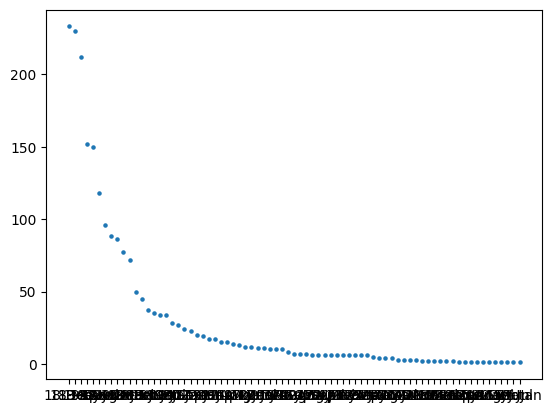

In [80]:
availability_dated = df10[df10.availability.str.match('\d{2}-\w{3}')].availability
plt.scatter(availability_dated.value_counts().index, availability_dated.value_counts(), s=5)

In [81]:
availability_dated.value_counts()[availability_dated.value_counts() > 20]

18-Dec    233
18-May    230
18-Apr    212
19-Dec    152
18-Aug    150
18-Jul    118
18-Mar     96
21-Dec     88
20-Dec     86
19-Mar     77
18-Jun     72
18-Feb     50
18-Nov     45
19-Jun     37
18-Oct     35
18-Jan     34
19-Jul     34
19-Jan     28
18-Sep     27
20-Jan     24
17-Dec     23
Name: availability, dtype: int64

In [82]:
availability_dummies = pd.get_dummies(df10.availability.str.split('-', expand = True))

In [83]:
availability_dummies.corrwith(df10.price)

0_15               0.013326
0_16               0.020301
0_17              -0.006875
0_18              -0.014195
0_19               0.036599
0_20              -0.026366
0_21              -0.024885
0_22               0.029044
0_Ready To Move    0.004667
1_Apr             -0.015250
1_Aug             -0.029024
1_Dec              0.006936
1_Feb              0.030508
1_Jan             -0.007386
1_Jul              0.009447
1_Jun              0.018104
1_Mar              0.011469
1_May             -0.006692
1_Nov             -0.023106
1_Oct             -0.008089
1_Sep             -0.004772
dtype: float64

In [84]:
df10.location.isna().any()

True

In [85]:
df10.location.fillna('Others', inplace=True)

In [86]:
df10.location.isna().any()

False

In [87]:
df10.location.value_counts()

Whitefield              455
Sarjapur  Road          337
Kanakpura Road          257
Electronic City         232
Thanisandra             229
                       ... 
1 Giri Nagar              1
kanakapura main road      1
3rd Phase JP Nagar        1
Patelappa Layout          1
Sarvobhogam Nagar         1
Name: location, Length: 1041, dtype: int64

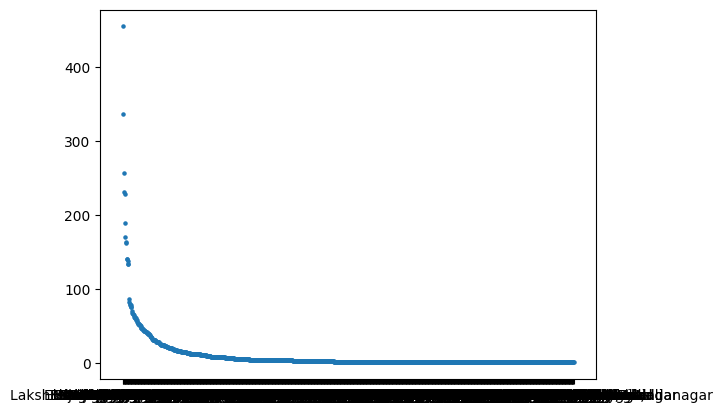

In [88]:
plt.scatter(df10.location.unique(), df10.location.value_counts(), s=5)

In [89]:
df10[df10.location.isin([df10.location.value_counts()[df10.location.value_counts()==10].index[0]])]

,availability,location,society,total_sqft,bath,price,bedrooms,kitchen,hall
1508,Ready To Move,Ananth Nagar,NaN,1100.0,2.0,31.5,2,1,1
2092,18-Dec,Ananth Nagar,Marnara,1109.0,2.0,60.0,2,1,1
3334,Ready To Move,Ananth Nagar,NaN,1200.0,2.0,65.0,3,1,1
4740,Ready To Move,Ananth Nagar,NaN,870.0,2.0,36.0,2,1,1
5665,Ready To Move,Ananth Nagar,Patri M,937.0,2.0,35.0,2,1,1
6401,Ready To Move,Ananth Nagar,NaN,1200.0,3.0,87.0,4,0,0
7429,Ready To Move,Ananth Nagar,Patri M,960.0,2.0,37.0,2,1,1
8910,Ready To Move,Ananth Nagar,VmlleRo,1470.0,3.0,54.0,3,1,1
9448,18-Aug,Ananth Nagar,NaN,1200.0,2.0,36.0,2,1,1
11085,Ready To Move,Ananth Nagar,NaN,1010.0,2.0,38.0,2,1,1


In [90]:
cutoff = 10

rel_ft_check = df10.location.value_counts()>=cutoff
irrel_ft_check = ~rel_ft_check

rel_ft_sum = rel_ft_check.sum()
irrel_ft_sum = irrel_ft_check.sum()

rel_ft_sum, irrel_ft_sum

(203, 838)

In [91]:
irrel_ft = irrel_ft_check.index[irrel_ft_check == True]

irrel_val_sum = df10.location.isin(irrel_ft).sum()
irrel_val_sum

2080

In [92]:
df11 = df10.copy()
df11.location[df10.location.isin(irrel_ft)] = 'Others'

<ipython-input-92-ff58798fdbf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.location[df10.location.isin(irrel_ft)] = 'Others'


In [93]:
df11.location.value_counts()

Others                  2080
Whitefield               455
Sarjapur  Road           337
Kanakpura Road           257
Electronic City          232
                        ... 
LB Shastri Nagar          10
Basapura                  10
Ananth Nagar              10
Kalkere                   10
Nagappa Reddy Layout      10
Name: location, Length: 204, dtype: int64

In [94]:
df11.society.describe()

count        6702
unique       2351
top       GrrvaGr
freq           80
Name: society, dtype: object

In [95]:
df11.society.isna().value_counts()

False    6702
True     3524
Name: society, dtype: int64

In [96]:
df11.society.fillna('Unknown', inplace=True)

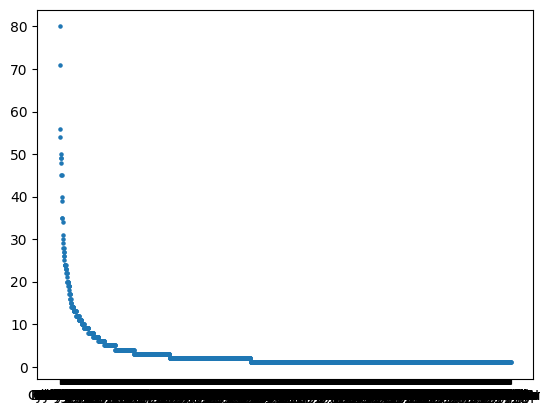

In [97]:
known_unique_val = df11.society.value_counts().drop('Unknown')

plt.scatter(known_unique_val.index, known_unique_val, s=5)

In [98]:
cutoff2 = 10

In [99]:
rel_ft_check_2 = df11.society.value_counts()>=cutoff2
irrel_ft_check_2 = ~rel_ft_check_2

rel_ft_2 = rel_ft_check_2.index[rel_ft_check_2]
irrel_ft_2 = irrel_ft_check_2.index[irrel_ft_check_2]

In [100]:
df12 = df11.copy()
df12.society[df12.society.isin(irrel_ft_2)] = 'Unknown'

<ipython-input-100-95a9c2e6527a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.society[df12.society.isin(irrel_ft_2)] = 'Unknown'


In [101]:
df12.society.unique().size

127

In [102]:
df12.society.describe()

count       10226
unique        127
top       Unknown
freq         7737
Name: society, dtype: object

In [103]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10226 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  10226 non-null  object 
 1   location      10226 non-null  object 
 2   society       10226 non-null  object 
 3   total_sqft    10226 non-null  float64
 4   bath          10226 non-null  float64
 5   price         10226 non-null  float64
 6   bedrooms      10226 non-null  int64  
 7   kitchen       10226 non-null  int64  
 8   hall          10226 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 798.9+ KB


In [104]:
location_dummies = pd.get_dummies(df12.location)
loc_price_corr = location_dummies.corrwith(df12.price)
loc_price_corr_cutoff = 0.05
loc_price_corr[(loc_price_corr>=loc_price_corr_cutoff)|(loc_price_corr<=-loc_price_corr_cutoff)]

Ambedkar Nagar              0.054840
EPIP Zone                   0.054875
Electronic City            -0.073965
Electronic City Phase II   -0.061527
Green Glen Layout           0.057572
Harlur                      0.051315
Hebbal                      0.076063
Hebbal Kempapura            0.055695
Hegde Nagar                 0.056502
Iblur Village               0.071896
Old Airport Road            0.105535
Old Madras Road             0.052923
Raja Rajeshwari Nagar      -0.057676
Rajaji Nagar                0.065211
Sarjapur  Road              0.057296
Thigalarapalya              0.119352
Uttarahalli                -0.067187
dtype: float64

In [105]:
location_dummies.sum()

 Devarachikkanahalli          12
1st Phase JP Nagar            17
2nd Phase Judicial Layout     11
5th Phase JP Nagar            34
6th Phase JP Nagar            15
                            ... 
Yelachenahalli                13
Yelahanka                    189
Yelahanka New Town            29
Yelenahalli                   13
Yeshwanthpur                  76
Length: 204, dtype: int64

In [106]:
society_dummies = pd.get_dummies(df12.society)
soc_price_corr = society_dummies.corrwith(df12.price)
soc_price_corr_cutoff = 0.05
soc_price_corr[(soc_price_corr>=soc_price_corr_cutoff)|(soc_price_corr<=-soc_price_corr_cutoff)]

Adeatlm    0.080327
Brica E    0.104594
BrontLa    0.063325
G conTh    0.055799
GrrvaGr   -0.062438
Jaades     0.125762
Klark L    0.052234
PrarePa   -0.060451
Prersis    0.053025
Prionad    0.054042
Prtanha    0.127463
PueraRi    0.108968
Raard B    0.088065
Saitya     0.060590
Sodgere    0.067696
Soitya     0.063731
Sryalan   -0.051592
Unknown   -0.065519
dtype: float64

In [107]:
df12.drop(['location', 'society', 'availability'], axis = 1, inplace=True)

In [108]:
df12.corr()

,total_sqft,bath,price,bedrooms,kitchen,hall
total_sqft,1.000000,0.819702,0.846290,0.809326,-0.260342,-0.251689
bath,0.819702,1.000000,0.726035,0.868058,-0.302222,-0.293541
price,0.846290,0.726035,1.000000,0.692990,-0.257095,-0.250401
bedrooms,0.809326,0.868058,0.692990,1.000000,-0.324306,-0.314617
kitchen,-0.260342,-0.302222,-0.257095,-0.324306,1.000000,0.992461
hall,-0.251689,-0.293541,-0.250401,-0.314617,0.992461,1.000000


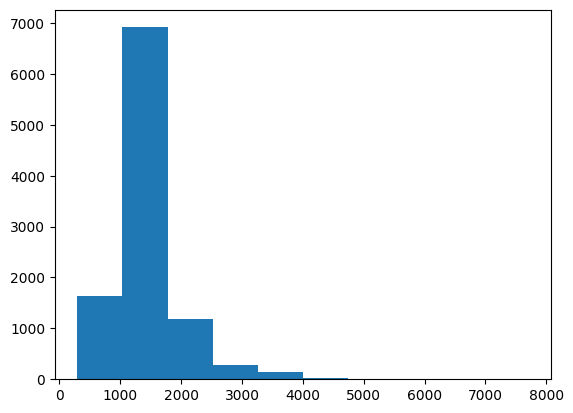

In [109]:
plt.hist(df12.total_sqft[df12.total_sqft<10000])
plt.show()

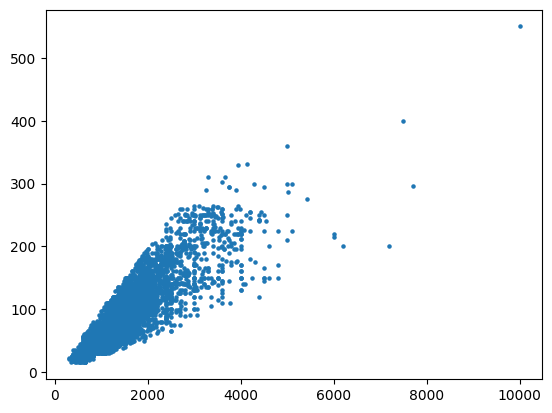

In [110]:
plt.scatter(df12.total_sqft, df12.price, s=5)

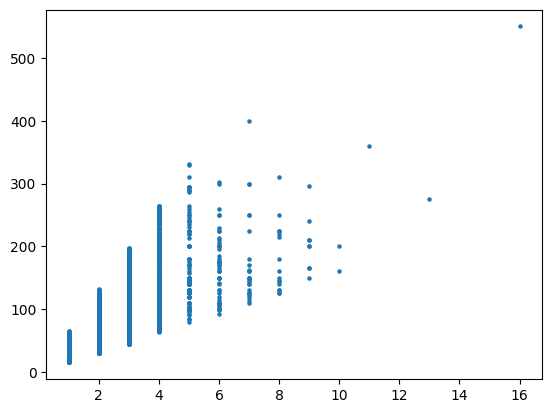

In [111]:
df13 = df12[df12.bedrooms <20]
plt.scatter(df13.bedrooms, df13.price, s=5)

In [112]:
new_column_names = area_type_dummies.columns.str.replace('\s+', ' ')

<ipython-input-112-669e555de1be>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_column_names = area_type_dummies.columns.str.replace('\s+', ' ')


In [113]:
area_type_dummies.rename(mapper=dict(zip(area_type_dummies.columns, new_column_names)), axis=1, inplace = True)

In [114]:
total_area = (area_type_dummies.T*df12.total_sqft).T
total_area

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0.0,0.0,0.0,1056.0
1,0.0,0.0,2600.0,0.0
2,1440.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1521.0
4,0.0,0.0,0.0,1200.0
...,...,...,...,...
13313,0.0,0.0,0.0,1345.0
13314,0.0,0.0,0.0,1715.0
13315,3453.0,0.0,0.0,0.0
13317,1141.0,0.0,0.0,0.0


In [115]:
total_area.corrwith(df12.price)

Built-up Area          0.237009
Carpet Area            0.037197
Plot Area              0.231620
Super built-up Area    0.303326
dtype: float64

In [116]:
sum = 0
for col in total_area.columns:
  sum += total_area[col][total_area[col] != 0].corr(df12.price)
sum/4

0.8496314871806893

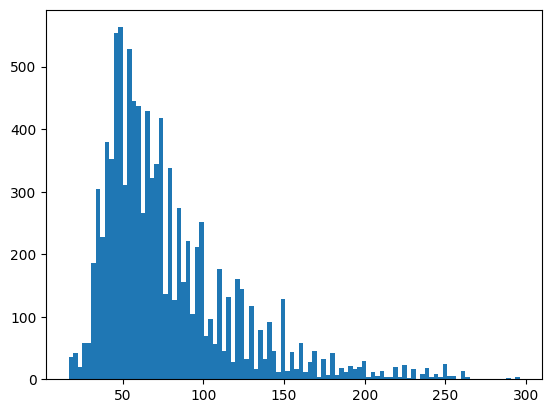

In [117]:
plt.hist(df12.price[(df12.price < df12.price.quantile(0.999))&(df12.price > df12.price.quantile(0.001))], 100)
plt.show()

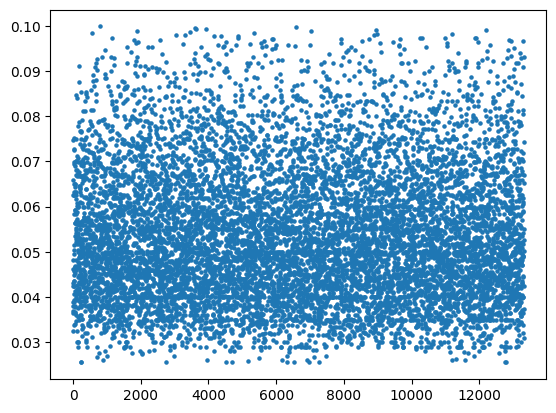

In [118]:
price_per_sqft = df12.price/df12.total_sqft
plt.scatter(price_per_sqft.index, price_per_sqft, s=5)

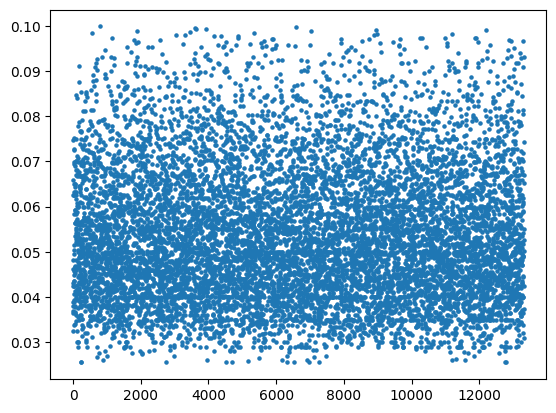

In [119]:
price_per_sqft = price_per_sqft[price_per_sqft < 1]
plt.scatter(price_per_sqft.index, price_per_sqft, s=5)

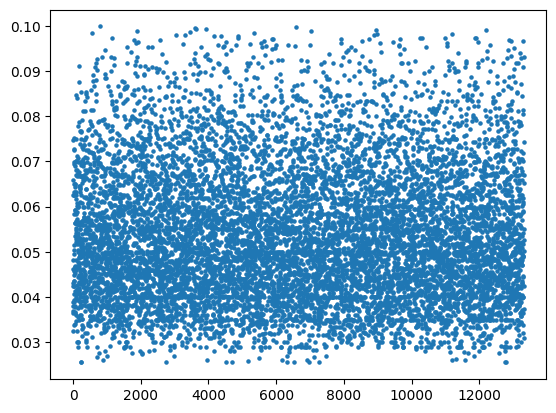

In [120]:
price_per_sqft = price_per_sqft[price_per_sqft > 0.01]
plt.scatter(price_per_sqft.index, price_per_sqft, s=5)

In [121]:
price_per_sqft.size, df12.price.size

(10226, 10226)

In [122]:
total_area.corrwith(df12.price)

Built-up Area          0.237009
Carpet Area            0.037197
Plot Area              0.231620
Super built-up Area    0.303326
dtype: float64

In [123]:
location_dummies = location_dummies.loc[df12.index]

In [124]:
df12.drop(['kitchen', 'hall'], 1, inplace=True)

<ipython-input-124-a8403d8ee712>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df12.drop(['kitchen', 'hall'], 1, inplace=True)


In [125]:
df12

,total_sqft,bath,price,bedrooms
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2
...,...,...,...,...
13313,1345.0,2.0,57.00,3
13314,1715.0,3.0,112.00,3
13315,3453.0,4.0,231.00,5
13317,1141.0,2.0,60.00,2


In [126]:
df13 = pd.concat([df12, location_dummies], 1)

<ipython-input-126-74f5a1e8dd5b>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df13 = pd.concat([df12, location_dummies], 1)


In [127]:
df14 = pd.concat([df13, total_area], 1)

<ipython-input-127-c353673f7d62>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df14 = pd.concat([df13, total_area], 1)


Model Training

In [128]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

In [142]:
x = df14.drop(['price'], 1)
y = df14.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

<ipython-input-142-c79befe8f818>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df14.drop(['price'], 1)


In [143]:
reg_1 = LinearRegression()
reg_1.fit(x_train, y_train)
reg_1.score(x_train, y_train), reg_1.score(x_test, y_test)

(0.7773163807603645, 0.7793470219710079)

In [144]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), x, y, cv=cv), cross_val_score(LinearRegression(), x, y, cv=cv).mean()

(array([0.77934702, 0.75201843, 0.77140237, 0.78132489, 0.78083557]),
 0.7729856568419573)

In [145]:
reg_2 = Ridge()
reg_2.fit(x_train, y_train)
reg_2.score(x_train, y_train), reg_2.score(x_test, y_test)

(0.7771879087349428, 0.7797872685620552)

In [146]:
cross_val_score(Ridge(), x, y, cv=cv), cross_val_score(Ridge(), x, y, cv=cv).mean()

(array([0.77978727, 0.75302288, 0.77216427, 0.78085356, 0.78291168]),
 0.773747933244643)

In [147]:
reg_3 = Lasso()
reg_3.fit(x_train, y_train)
reg_3.score(x_train, y_train), reg_3.score(x_test, y_test)

(0.7187250288411041, 0.7324300694766337)

In [148]:
cross_val_score(Lasso(), x, y, cv=cv), cross_val_score(Lasso(), x, y, cv=cv).mean()

(array([0.73243007, 0.71210334, 0.72313787, 0.73387963, 0.73895702]),
 0.7281015861829999)

In [149]:
reg_4 = RandomForestRegressor()
reg_4.fit(x_train, y_train)
reg_4.score(x_train, y_train), reg_4.score(x_test, y_test)

(0.9553184391711586, 0.7992860540987639)

In [150]:
cross_val_score(RandomForestRegressor(), x, y, cv=cv), cross_val_score(RandomForestRegressor(), x, y, cv=cv).mean()

(array([0.80030787, 0.77492292, 0.78158192, 0.80592908, 0.79869144]),
 0.7931968421138117)

In [151]:
import pickle

In [152]:
reg = Ridge()
x_trainset = df14.drop(['price'], 1)
y_trainset = df14.price
reg.fit(x_trainset, y_trainset)

with open("price_estimator_model.pickle", "wb") as f:
  pickle.dump(reg, f)

<ipython-input-152-2a23af5ba2b6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_trainset = df14.drop(['price'], 1)


In [153]:
import json
columns = {
    "data_columns" : [col for col in x_trainset.columns],
    "location_columns" : [col for col in location_dummies.columns],
    "area_type_columns" : [col for col in total_area.columns]
}

In [154]:
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))